# Project : Springleaf- Which customers will respond to direct mail 

## BDDA-1 , Group 4 :

015002 - Anuksha Jain

015005 - Ayushi Gupta

015015 - Aniket Nandy

015025 - Biswadip Das

015045 - Siddharth Gupta

#### Importing Libraries:

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For Displaying outputs of all commands from a cell and not just for the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings   # Import warnings module
# To do not print warnings on screen
warnings.filterwarnings("ignore")

import zipfile # To help read zip file

# For splitting dataset into training and testing data
from sklearn.model_selection import train_test_split


# Transformers :
# Class for imputing missing values
from sklearn.impute import SimpleImputer

# One hot encoder for categorical data
from sklearn.preprocessing import OneHotEncoder as onehot

# For Scaling numeric data
from sklearn.preprocessing import StandardScaler

# Label encoder for transforming target column
from sklearn.preprocessing import LabelEncoder


#Estimator
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

### Loading the data

In [3]:
# read the dataset using the compression zip
df=pd.read_csv("train.csv.zip",compression='zip')

In [4]:
# Top 5 rows of data
df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


### Data Exploration

In [5]:
#Bried info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145231 entries, 0 to 145230
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 2.1+ GB


In [6]:
df.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,145231.000000,145231.000000,145231.000000,1.452310e+05,145175.000000,145175.00000,145175.000000,145175.000000,145175.000000,145175.000000,...,145231.000000,145231.000000,145231.000000,145231.000000,1.452310e+05,145231.000000,145231.000000,145231.000000,145231.000000,145231.000000
mean,145124.981808,105.278040,88.492285,3.721946e+03,0.693907,0.51316,0.693907,0.494493,0.476763,1.447598,...,0.549965,86.664369,89.828762,914.417259,9.904497e+08,922.938505,936.487905,9942.162279,8849.839111,0.232547
std,83890.290627,143.351237,125.903323,1.228001e+04,1.604578,1.17531,1.604578,1.115085,1.000755,1.132784,...,6.361312,31.347700,26.928221,276.361514,9.725818e+07,212.087416,210.370833,743.153332,3175.797333,0.422457
min,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72342.500000,24.000000,13.000000,1.790000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
50%,145272.000000,60.000000,55.000000,2.500000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
75%,217686.500000,132.000000,120.000000,3.600000e+03,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
max,290463.000000,999.000000,999.000000,2.200000e+06,68.000000,66.00000,68.000000,67.000000,35.000000,39.000000,...,99.000000,99.000000,99.000000,999.000000,1.000000e+09,999.000000,999.000000,9999.000000,9999.000000,1.000000


In [7]:
# Shape of data: (Number of rors, Number of columns)
df.shape

(145231, 1934)

In [8]:
df.memory_usage().sum() # Memory usage by datafeame df in Bytes

2247014160

In [9]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [10]:
# Randomly shuffle data as values 
df = df.sample(frac = 1) 

In [11]:
# To drop ID column as it is not required in modeling or even Data exploration
df.drop("ID", axis=1, inplace=True)

In [12]:
#To print number of null values in each column/feature
df.isnull().sum()

VAR_0001         0
VAR_0002         0
VAR_0003         0
VAR_0004         0
VAR_0005         0
VAR_0006        56
VAR_0007        56
VAR_0008        56
VAR_0009        56
VAR_0010        56
VAR_0011        56
VAR_0012        56
VAR_0013        56
VAR_0014        56
VAR_0015        56
VAR_0016        56
VAR_0017        56
VAR_0018        56
VAR_0019        56
VAR_0020        56
VAR_0021        56
VAR_0022        56
VAR_0023        56
VAR_0024        56
VAR_0025        56
VAR_0026        56
VAR_0027        56
VAR_0028        56
VAR_0029        56
VAR_0030        56
VAR_0031        56
VAR_0032        56
VAR_0033        56
VAR_0034        56
VAR_0035        56
VAR_0036        56
VAR_0037        56
VAR_0038        56
VAR_0039        56
VAR_0040        56
VAR_0041        56
VAR_0042        56
VAR_0043        56
VAR_0044        56
VAR_0045        56
VAR_0046        56
VAR_0047        56
VAR_0048        56
VAR_0049        56
VAR_0050        56
VAR_0051        56
VAR_0052        56
VAR_0053    

In [13]:
count_unique_values = df.nunique().sort_values()

#find features that have constant values only
constantfeatures = [features for features in df.columns if count_unique_values[features] == 1]

print("Number of Constant features are:")
print(len(constantfeatures)) #such features do not provide any information and only make our dataset larger.

# Removing features with constant values
df.drop(constantfeatures, axis=1, inplace=True)

Number of Constant features are:
51


In [14]:
# Understanding which features are catagorical and which are numerical based on datatype for imputation
catagorical_features = df.select_dtypes(include=[np.object]).columns 
numerical_features = df.select_dtypes(include=[np.number]).columns

In [15]:
len(catagorical_features)

38

In [16]:
len(numerical_features)

1844

In [17]:
#To print unique values of catagorical featured (object data type)
for feature in catagorical_features:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('Number of Unique values:',df[feature].nunique())
    print('Unique Values:',df[feature].unique())


 
************* Column name: VAR_0001 *************
Number of Unique values: 3
Unique Values: ['R' 'H' 'Q']

 
************* Column name: VAR_0005 *************
Number of Unique values: 4
Unique Values: ['B' 'N' 'C' 'S']

 
************* Column name: VAR_0073 *************
Number of Unique values: 1458
Unique Values: [nan '15APR12:00:00:00' '14JUL11:00:00:00' ... '20AUG08:00:00:00'
 '08MAY08:00:00:00' '05FEB08:00:00:00']

 
************* Column name: VAR_0075 *************
Number of Unique values: 2371
Unique Values: ['07DEC11:00:00:00' '14APR09:00:00:00' '16OCT12:00:00:00' ...
 '18OCT08:00:00:00' '05DEC05:00:00:00' '17MAY08:00:00:00']

 
************* Column name: VAR_0156 *************
Number of Unique values: 730
Unique Values: [nan '26SEP08:00:00:00' '11JUL11:00:00:00' '29DEC11:00:00:00'
 '24DEC11:00:00:00' '14AUG11:00:00:00' '12JUL12:00:00:00'
 '07JUN12:00:00:00' '06JUN12:00:00:00' '05MAY12:00:00:00'
 '01SEP11:00:00:00' '17SEP12:00:00:00' '14MAY12:00:00:00'
 '01DEC11:00:00:00' '2

In [18]:
# missing values in %
percent_missing = 100* df.isnull().sum()/len(df)
percent_missing

VAR_0001      0.000000
VAR_0002      0.000000
VAR_0003      0.000000
VAR_0004      0.000000
VAR_0005      0.000000
VAR_0006      0.038559
VAR_0007      0.038559
VAR_0013      0.038559
VAR_0014      0.038559
VAR_0015      0.038559
VAR_0016      0.038559
VAR_0017      0.038559
VAR_0033      0.038559
VAR_0034      0.038559
VAR_0035      0.038559
VAR_0036      0.038559
VAR_0037      0.038559
VAR_0045      0.038559
VAR_0046      0.038559
VAR_0047      0.038559
VAR_0048      0.038559
VAR_0049      0.038559
VAR_0050      0.038559
VAR_0051      0.038559
VAR_0052      0.038559
VAR_0053      0.038559
VAR_0054      0.038559
VAR_0055      0.038559
VAR_0056      0.038559
VAR_0057      0.038559
VAR_0058      0.038559
VAR_0059      0.038559
VAR_0060      0.038559
VAR_0061      0.038559
VAR_0062      0.038559
VAR_0063      0.038559
VAR_0064      0.038559
VAR_0065      0.038559
VAR_0066      0.038559
VAR_0067      0.038559
VAR_0068      0.038559
VAR_0069      0.038559
VAR_0070      0.038559
VAR_0071   

In [19]:
# Calculating how many features have more than 10% of data missing in them
np.sum(percent_missing > 10)

24

In [20]:
# Calculating how many features have more than 50% of data missing in them
np.sum(percent_missing > 50)

24

In [21]:
# Remove these 24 features,as these have more than 50% data missing
missing = [feature for feature in df.columns if percent_missing[feature] > 50]
df.drop(missing, axis=1, inplace=True)

In [22]:
df.shape

(145231, 1858)

In [23]:
df.head()

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
75199,R,24,72,4071,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
116126,R,125,53,1700,B,3.0,3.0,3.0,3.0,2.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,1
21449,H,69,58,1300,N,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
67745,H,12,13,2582,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
16252,R,114,54,1500,C,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0


In [24]:
remove_missing_features = [feature for feature in df.columns if percent_missing[feature] < 0.5]
fill_missing_features = [feature for feature in df.columns if percent_missing[feature] > 0.5] 

In [25]:
# filling in the missing data for features containing many of them
for col in fill_missing_features:
    if col in catagorical_features:
        # For catagorical feature fill missing data with mode
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df[col].fillna(df[col].mean(), inplace=True)

# removing rows with less than 0.5% missing data in them (only a few examples will be deleted )
df.dropna(axis=0, inplace=True)

In [26]:
df.shape

(144271, 1858)

In [27]:
df.isnull().sum().max()

0

In [28]:
print(df.duplicated().sum()) # no. Of duplicate rows

0


In [30]:
df.columns.duplicated().sum()

0

In [31]:
# To store column types
coltypes = {}

# A Function to reduce memory

def reduce_memory_usage(df):
    # This function iterate through all the columns of a dataframe and modify the data type to reduce memory usage. 
        
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe before optimization is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    coltypes[col] = np.int8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    coltypes[col] = np.int16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    coltypes[col] = np.int32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
                    coltypes[col] = np.int64  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    coltypes[col] = np.float16
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    coltypes[col] = np.float32
                else:
                    df[col] = df[col].astype(np.float64)
                    coltypes[col] = np.float64
  
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df,coltypes

In [32]:
# Reduce memory usage For not null columns and store it in df_reduced
df_reduced=df.copy()

# Apply reduce_mem_usage()
df_reduced,feat_types = reduce_memory_usage(df)

Memory usage of dataframe before optimization is 2046.20 MB
Memory usage after optimization is: 582.68 MB
Decreased by 71.5%


In [33]:
corr=df_reduced.corr()
corr['target'].sort_values(ascending=False).head(10)

target      1.000000
VAR_0105    0.212183
VAR_0121    0.205769
VAR_0505    0.203621
VAR_0104    0.202956
VAR_0120    0.200773
VAR_0145    0.200528
VAR_0113    0.199442
VAR_0015    0.197359
VAR_0017    0.195732
Name: target, dtype: float64

In [34]:
corr['target'].sort_values(ascending = False,na_position ='first').tail(10)

VAR_0946   -0.129878
VAR_0884   -0.129991
VAR_0810   -0.130085
VAR_0805   -0.130086
VAR_0800   -0.130087
VAR_0892   -0.130433
VAR_0895   -0.133258
VAR_0907   -0.138800
VAR_0540   -0.142647
VAR_0886   -0.200937
Name: target, dtype: float64

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'Pearson correlation')

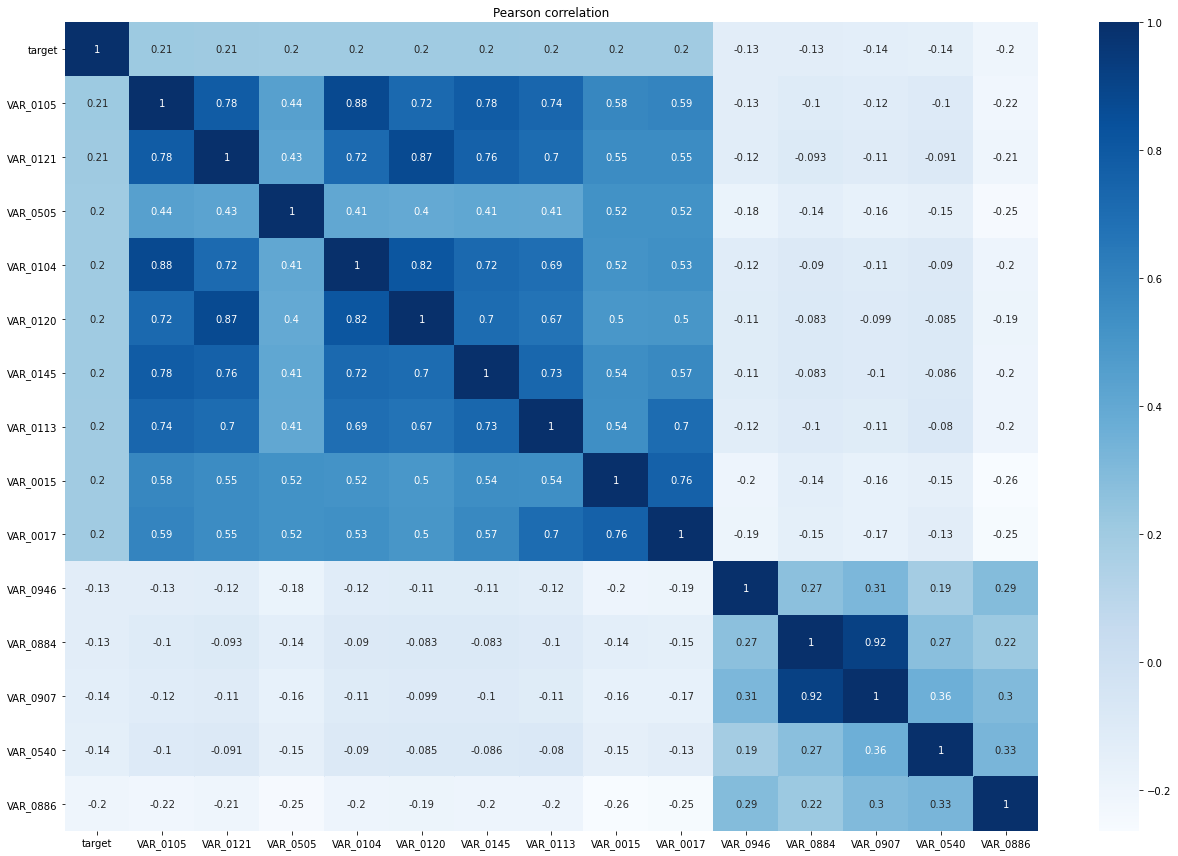

In [37]:
#CORELATION
plt.figure(figsize=(18,12))
sns.heatmap(df_reduced[['target','VAR_0105','VAR_0121','VAR_0505','VAR_0104','VAR_0120','VAR_0145','VAR_0113','VAR_0015','VAR_0017','VAR_0946','VAR_0884','VAR_0907','VAR_0540','VAR_0886']].corr('pearson'),annot=True,cmap='Blues');
plt.title('Pearson correlation')
plt.tight_layout()

### Taking a sample of data for modeling

In [47]:
# reduce size of data to prevent kernel crashes by random sampling
SAMPLE_SIZE = 5000
rand_idx = np.random.randint(0, len(df_reduced), size=SAMPLE_SIZE)
sampledf = df_reduced.iloc[rand_idx,]
sampledf.shape

(5000, 1858)

In [48]:
sampledf.head()

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
63358,H,64,65,9500,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
10210,H,148,40,5392,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
5241,R,19,0,4250,B,1.0,0.0,1.0,0.0,1.0,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
36440,H,228,288,3750,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,CSC,0
5656,H,168,96,2018,C,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0


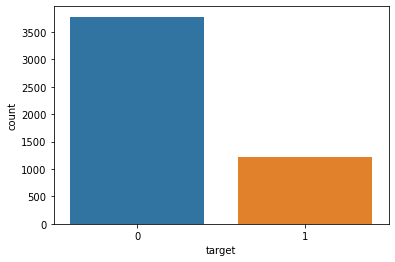

In [49]:
sns.countplot(sampledf.target)

In [50]:
print(round(sampledf.target.value_counts() *100/ sampledf.target.count(),2))

0    75.52
1    24.48
Name: target, dtype: float64


In [51]:
y = sampledf.pop('target')
X=sampledf

In [52]:
y.shape

(5000,)

In [53]:
X.shape

(5000, 1857)

In [54]:
X_c=X.copy()

In [55]:
y_c=y.copy()

In [56]:
catagorical_col = X_c.select_dtypes(include=[np.object]).columns
numerical_col = X_c.select_dtypes(include=[np.number]).columns

In [57]:
ohe = onehot(sparse = False)
ohe.fit_transform(X_c[catagorical_col])

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [58]:
ss = StandardScaler()
ss.fit_transform(X_c[numerical_col])

array([[-0.28794874, -0.16609077,  0.53181584, ...,  0.30173363,
         0.06831633,  0.36856928],
       [ 0.2837076 , -0.38818713,  0.15298009, ...,  0.30173363,
         0.06831633,  0.36856928],
       [-0.59419321, -0.74354132,  0.04766597, ...,  0.30173363,
         0.06831633,  0.36856928],
       ...,
       [-0.6758584 , -0.55698037, -0.19422453, ...,  0.30173363,
         0.06831633,  0.36856928],
       [ 0.25648586, -0.61916735, -0.02481819, ..., -4.30143615,
         0.06535601, -2.70914135],
       [-0.52613888, -0.42372255, -0.10412655, ...,  0.30173363,
         0.06831633,  0.36856928]])

In [59]:
# So complete dataset is:
a = ohe.transform(X_c[catagorical_col])
b = ss.transform(X_c[numerical_col])

# After transformation Horizontally concatenate the data now
Xtr = np.hstack([a,b]) 
Xtr.shape 

(5000, 7242)

In [60]:
# Label encode target feature 
print("Unencoded target column is:",y_c)

# Label Encode
le = LabelEncoder()
le.fit(y_c)

y_c = le.fit_transform(y_c)

print("Encoded y is: ",y_c)   

Unencoded target column is: 63358     0
10210     0
5241      0
36440     0
5656      0
48950     0
112281    0
132865    0
13554     0
35734     1
82889     0
109478    0
7798      0
84401     0
108677    0
9037      0
139911    0
62203     0
95309     0
94354     0
20442     0
76699     0
7505      0
132354    0
54157     0
110181    1
21414     0
135195    1
124166    1
87271     0
97908     0
66321     0
99856     0
50665     1
125490    0
142884    0
19512     0
34227     0
23025     1
19540     0
126539    0
5706      0
133150    0
11076     1
28197     1
25757     0
77889     0
97537     0
45496     1
141880    0
103324    0
123627    0
98285     0
118372    0
106150    1
46665     1
141351    1
10444     0
28941     0
41147     1
90469     0
64867     0
111839    1
67841     1
72767     1
36943     1
93897     0
6107      0
78042     0
58573     0
47824     0
13727     1
81900     0
97978     0
126284    1
66545     0
78797     1
20592     0
31724     1
100826    1
106684    0


LabelEncoder()

Encoded y is:  [0 0 0 ... 1 0 1]


### Splitting into train and test

In [61]:
X_c=Xtr
X_train,X_test, y_train, y_test = train_test_split(
                                                    X_c,                   # Data features
                                                    y_c,                   # Target column
                                                    test_size = 0.2,     # split-ratio
                                                    random_state = 10    
                                                    )

In [62]:
def plots(p,predict,train,xlabel):
    plt.plot(p,predict,'g')
    plt.plot(p,train,'b')
    plt.title('Variation of Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend(('Test','Train'))

In [74]:
neighbors,score_predict,score_train = [3,4,5,6,7,8],[],[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_ptrain = knn.predict(X_train)
    y_predict = knn.predict(X_test)
    score_predict.append(accuracy_score(y_test,y_predict))
    score_train.append(accuracy_score(y_train,y_ptrain))

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

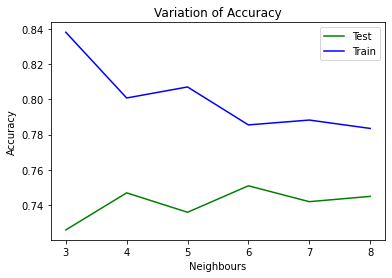

In [64]:
plots(neighbors,score_predict,score_train,'Neighbours')

In [75]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res1 = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res1


KNeighborsClassifier(n_neighbors=6)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.751,0.464286,0.106122,0.172757,0.533194


In [76]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res2 = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res2

LogisticRegression()

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.708,0.394619,0.359184,0.376068,0.590188


In [77]:
depths,score_train,score_predict = [3,4,5,6,8,10,12,14,16,18,20],[],[]
for depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    dtc.fit(X_train,y_train)
    y_ptrain = dtc.predict(X_train)
    y_predict = dtc.predict(X_test)
    score_train.append(accuracy_score(y_train,y_ptrain))
    score_predict.append(accuracy_score(y_test,y_predict))

DecisionTreeClassifier(criterion='entropy', max_depth=3)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

DecisionTreeClassifier(criterion='entropy', max_depth=14)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

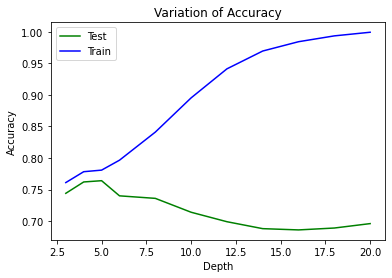

In [78]:
plots(depths,score_predict,score_train,'Depth')

In [79]:
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res3 = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res3

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

array([[707,  48],
       [188,  57]], dtype=int64)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.764,0.542857,0.232653,0.325714,0.584538


In [80]:
estimators,score_train,score_predict = [10,50,80,100,150,200,250,300,500],[],[]
for est in estimators:
    rfc = RandomForestClassifier(n_estimators=est,criterion='entropy',max_depth=5,random_state=10)
    rfc.fit(X_train,y_train)
    y_ptrain = rfc.predict(X_train)
    y_predict = rfc.predict(X_test)
    score_train.append(accuracy_score(y_train,y_ptrain))
    score_predict.append(accuracy_score(y_test,y_predict))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=80,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,
                       random_state=10)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=10)

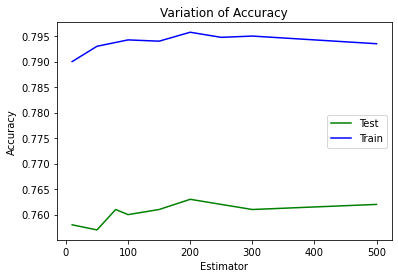

In [81]:
plots(estimators,score_predict,score_train,'Estimator')

In [82]:
rfc = RandomForestClassifier(n_estimators = 200,criterion = 'entropy',random_state = 0)
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res4 = pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

res4

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

array([[721,  34],
       [203,  42]], dtype=int64)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.763,0.552632,0.171429,0.261682,0.563198


In [86]:
result = res1
result = result.append(res2,ignore_index = True)
result = result.append(res3,ignore_index = True)
result = result.append(res4,ignore_index = True)
result

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.751,0.464286,0.106122,0.172757,0.533194
1,Logistic Regression,0.708,0.394619,0.359184,0.376068,0.590188
2,Decision Tree Classifier,0.764,0.542857,0.232653,0.325714,0.584538
3,Random Forest,0.763,0.552632,0.171429,0.261682,0.563198


<Figure size 576x576 with 0 Axes>

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

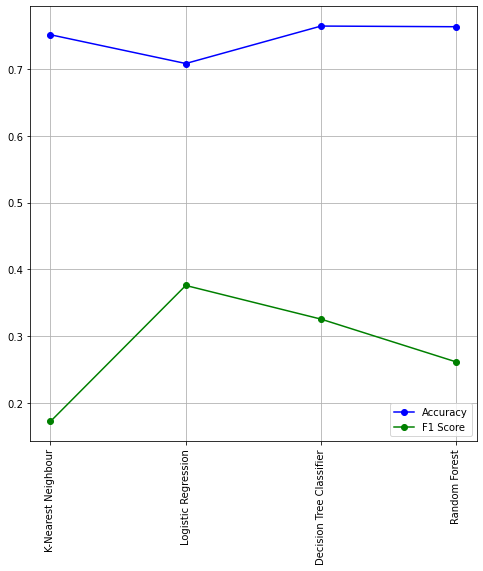

In [88]:
plt.figure(figsize =(8,8))
plt.plot(result['Model'],result['Accuracy'],color='b',marker='o')
plt.plot(result['Model'],result['F1 Score'],color='g',marker='o')
plt.xticks(rotation= 90)
plt.grid(True)
plt.legend(('Accuracy','F1 Score'))
plt.show()

Random Forest and Decision Tree Classifier have highest accuracies . We select Random Forest as the better model because it has high accuracy as well as precision and low F1 Score